In [1]:
'''
Author : @nitish11
Problem : A classification problem based on the contest of Analytics Vidya
Ref: https://datahack.analyticsvidhya.com/contest/knocktober-2016/
'''

'\nAuthor : @nitish11\nProblem : A classification problem based on the contest of Analytics Vidya\nRef: https://datahack.analyticsvidhya.com/contest/knocktober-2016/\n'

In [2]:
import numpy as np
import sklearn
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
import pandas as pd
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import cPickle as pickle
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#Load data:
train = pd.read_csv('Training_final.csv')
test = pd.read_csv('Test_final.csv')

In [4]:
train.shape, test.shape

((75278, 20), (35249, 19))

In [5]:
train.dtypes


Patient_ID             int64
Health_Camp_ID         int64
Var1                   int64
Var2                   int64
Var3                   int64
Var4                   int64
Var5                   int64
Category1              int64
Category2              int64
Category3              int64
Outcome              float64
Online_Follower        int64
LinkedIn_Shared        int64
Twitter_Shared         int64
Facebook_Shared        int64
Income               float64
Education_Score      float64
Age                  float64
City_Type            float64
Employer_Category    float64
dtype: object

In [6]:
#Combine into data:
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(110527, 21)

In [7]:
data.apply(lambda x: sum(x.isnull()))

Age                  77925
Category1                0
Category2                0
Category3                0
City_Type            46602
Education_Score      98167
Employer_Category    90963
Facebook_Shared          0
Health_Camp_ID           0
Income               81342
LinkedIn_Shared          0
Online_Follower          0
Outcome              35249
Patient_ID               0
Twitter_Shared           0
Var1                     0
Var2                     0
Var3                     0
Var4                     0
Var5                     0
source                   0
dtype: int64

In [8]:
#Majority values missing so I'll create a new variable stating whether this is missing or not:
data['City_Type'] = data['City_Type'].fillna(10)

#Inpute by median 
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Income'].fillna(data['Income'].median(),inplace=True)


In [9]:
#dropping one where most are empty.

data.drop('Education_Score',axis=1,inplace=True)
data.drop('Employer_Category',axis=1,inplace=True)


In [10]:
data.describe()

,Age,Category1,Category2,Category3,City_Type,Facebook_Shared,Health_Camp_ID,Income,LinkedIn_Shared,Online_Follower,Outcome,Patient_ID,Twitter_Shared,Var1,Var2,Var3,Var4,Var5
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,75278.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,45.241452,0.637283,3.763035,1.996318,6.403576,0.053933,6554.155238,1.059216,0.063451,0.054521,0.272776,507165.587956,0.051354,0.803505,0.243262,0.000443,0.028617,0.251504
std,6.777901,0.785540,2.022261,0.060571,3.655189,0.225886,20.012530,0.715125,0.243773,0.227043,0.445389,12428.699297,0.220720,7.847266,3.839489,0.021051,0.224176,1.245794
min,30.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6523.000000,0.000000,0.000000,0.000000,0.000000,485678.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,3.000000,2.000000,3.000000,0.000000,6537.000000,1.000000,0.000000,0.000000,0.000000,496392.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,4.000000,2.000000,7.000000,0.000000,6551.000000,1.000000,0.000000,0.000000,0.000000,507203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,1.000000,5.000000,2.000000,10.000000,0.000000,6574.000000,1.000000,0.000000,0.000000,1.000000,517915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,2.000000,6.000000,2.000000,10.000000,1.000000,6587.000000,6.000000,1.000000,1.000000,1.000000,528657.000000,1.000000,344.000000,181.000000,1.000000,8.000000,34.000000


In [11]:
#Extra dropping which boosted perfomance

data.drop('City_Type',axis=1,inplace=True)
#data.drop('Age',axis=1,inplace=True)
#data.drop('Income',axis=1,inplace=True)

In [12]:
data.describe()

,Age,Category1,Category2,Category3,Facebook_Shared,Health_Camp_ID,Income,LinkedIn_Shared,Online_Follower,Outcome,Patient_ID,Twitter_Shared,Var1,Var2,Var3,Var4,Var5
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,75278.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,45.241452,0.637283,3.763035,1.996318,0.053933,6554.155238,1.059216,0.063451,0.054521,0.272776,507165.587956,0.051354,0.803505,0.243262,0.000443,0.028617,0.251504
std,6.777901,0.785540,2.022261,0.060571,0.225886,20.012530,0.715125,0.243773,0.227043,0.445389,12428.699297,0.220720,7.847266,3.839489,0.021051,0.224176,1.245794
min,30.000000,0.000000,0.000000,1.000000,0.000000,6523.000000,0.000000,0.000000,0.000000,0.000000,485678.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,3.000000,2.000000,0.000000,6537.000000,1.000000,0.000000,0.000000,0.000000,496392.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,4.000000,2.000000,0.000000,6551.000000,1.000000,0.000000,0.000000,0.000000,507203.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,1.000000,5.000000,2.000000,0.000000,6574.000000,1.000000,0.000000,0.000000,1.000000,517915.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,2.000000,6.000000,2.000000,1.000000,6587.000000,6.000000,1.000000,1.000000,1.000000,528657.000000,1.000000,344.000000,181.000000,1.000000,8.000000,34.000000


In [13]:
#Separate train & test:

train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

train.drop('source',axis=1,inplace=True)
test.drop(['source','Outcome'],axis=1,inplace=True)

train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame


In [14]:
train_data = pd.read_csv('train_modified.csv')
test_data = pd.read_csv('test_modified.csv')


predictors = ['Online_Follower','Age', 'Income','Twitter_Shared','Var1','Var2','Var4','Var5','Category1','Category2','Facebook_Shared','LinkedIn_Shared']
x_train, x_test, y_train, y_test = train_test_split(train_data[predictors],train_data["Outcome"], test_size=.01)

In [15]:
print('-'*30)
print('Decision Tree Classifier')
decison_tree_classifier = DecisionTreeClassifier()
#Training Classifier, Prediction and Accuracy Calculation
decison_tree_classifier.fit(x_train, y_train)
pickle.dump(decison_tree_classifier,open('decision_tree_classifier.p','wb'))
predictions = decison_tree_classifier.predict(x_test) 
print accuracy_score(y_test,predictions)

print('-'*30)
print('Preiction using decision_tree_classifier')
# Make predictions using the test set.
predictions = decison_tree_classifier.predict(test_data[predictors])

submission = pd.DataFrame({
        "Patient_ID": test_data["Patient_ID"],
        "Health_Camp_ID": test_data["Health_Camp_ID"],
        "Outcome": predictions
    })
submission.to_csv('decision_tree.csv',index=False)

------------------------------
Decision Tree Classifier
0.771580345286
------------------------------
Preiction using decision_tree_classifier


In [16]:
print('-'*30)
print('GradientBoostingClassifier')
alg_gradient_boosting_classifier = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
alg_gradient_boosting_classifier.fit(train_data[predictors], train_data['Outcome'])
scores=cross_validation.cross_val_score(alg_gradient_boosting_classifier,train_data[predictors],train_data["Outcome"],cv=3)
print(scores.mean())
pickle.dump(alg_gradient_boosting_classifier,open('gradient_boosting_model.p','wb'))

print('-'*30)
print('Prediction using gradient_boosting_model')
predictions = alg_gradient_boosting_classifier.predict(test_data[predictors])

submission = pd.DataFrame({
        "Patient_ID": test_data["Patient_ID"],
        "Health_Camp_ID": test_data["Health_Camp_ID"],
        "Outcome": predictions
    })
submission.to_csv('gradient_boosting.csv',index=False)

------------------------------
GradientBoostingClassifier
0.746579771446
------------------------------
Prediction using gradient_boosting_model


In [17]:
print('-'*30)
print('RandomForestClassifier')
alg_random_classifier = RandomForestClassifier(random_state=1, n_estimators=25, max_depth=3)
alg_random_classifier.fit(train_data[predictors], train_data['Outcome'])
scores=cross_validation.cross_val_score(alg_random_classifier,train_data[predictors],train_data["Outcome"],cv=3)
print(scores.mean())
pickle.dump(alg_random_classifier,open('random_forest_model.p','wb'))

print('-'*30)
print('Prediction using random_forest_model')
predictions = alg_random_classifier.predict(test_data[predictors])

submission = pd.DataFrame({
        "Patient_ID": test_data["Patient_ID"],
        "Health_Camp_ID": test_data["Health_Camp_ID"],
        "Outcome": predictions
    })
submission.to_csv('random_forest.csv',index=False)

------------------------------
RandomForestClassifier
0.745384098726
------------------------------
Prediction using random_forest_model


In [18]:
print('-'*30)
from xgboost.sklearn import XGBClassifier
print('XGBClassifier')
xgb_classifier = XGBClassifier(n_estimators=300, max_depth=5)
xgb_classifier.fit(train_data[predictors], train_data['Outcome'])
scores=cross_validation.cross_val_score(xgb_classifier,train_data[predictors],train_data["Outcome"],cv=5)
print(scores.mean())
pickle.dump(xgb_classifier,open('xgb_classifier.p','wb'))

print('-'*30)
print('Prediction using xgb_classifier_model')
predictions = xgb_classifier.predict(test_data[predictors])

submission = pd.DataFrame({
        "Patient_ID": test_data["Patient_ID"],
        "Health_Camp_ID": test_data["Health_Camp_ID"],
        "Outcome": predictions
    })
submission.to_csv('xgb_classifier.csv',index=False)

------------------------------
XGBClassifier
0.744694973053
------------------------------
Prediction using xgb_classifier_model


In [19]:
########### SVM Classifier and Accuracy Calculation ###########

print('-'*30)
print('SVM outputs')
from sklearn import svm, metrics
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)
pickle.dump(classifier,open('svm_classifier.p','wb'))

expected = y_test
predicted = classifier.predict(x_test)
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

print('-'*30)
print('Prediction using SVM_model')
predictions = classifier.predict(test_data[predictors])

submission = pd.DataFrame({
        "Patient_ID": test_data["Patient_ID"],
        "Health_Camp_ID": test_data["Health_Camp_ID"],
        "Outcome": predictions
    })
submission.to_csv('svm_output.csv',index=False)

------------------------------
SVM outputs
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.82      0.91      0.87       562
        1.0       0.63      0.43      0.51       191

avg / total       0.77      0.79      0.78       753


Confusion matrix:
[[513  49]
 [109  82]]
------------------------------
Prediction using SVM_model


## XGB using xgboost

Reference : https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [20]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'Outcome'
test_results = pd.read_csv('test_results.csv')

In [21]:
def modelfit(alg, dtrain, dtest, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtest = xgb.DMatrix(dtest[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Outcome'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Outcome'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Outcome'], dtrain_predprob)
    
    #Predict on testing data:
    dtest['predprob'] = alg.predict_proba(dtest[predictors])[:,1]
    results = test_results.merge(dtest[['Patient_ID','predprob']], on='Patient_ID')
    print 'AUC Score (Test): %f' % metrics.roc_auc_score(results['Outcome'], results['predprob'])
    
    predictions = alg.predict(dtest[predictors])
    submission = pd.DataFrame({
            "Patient_ID": dtest["Patient_ID"],
            "Health_Camp_ID": dtest["Health_Camp_ID"],
            "Outcome": predictions
        })
    submission.to_csv('xgboost.csv',index=False)
                
    #Plotting features
    feat_imp = pd.Series(alg.booster().get_fscore())
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

    


Model Report
Accuracy : 0.7754
AUC Score (Train): 0.806152
AUC Score (Test): 0.602997


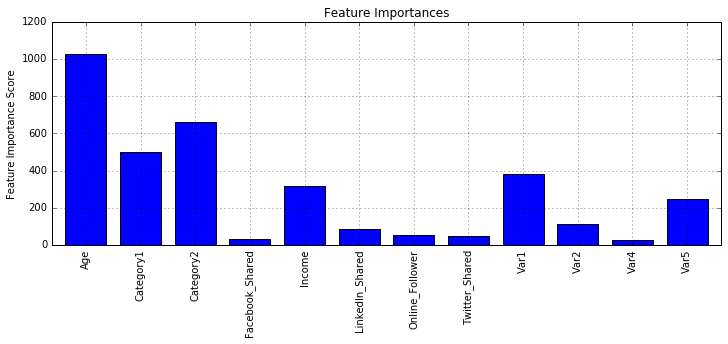

In [22]:
xgb1 = XGBClassifier(
        learning_rate =0.01,
        n_estimators=500,
        max_depth=3,
        min_child_weight=1,
        gamma=0.001,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1, train_data, test_data, predictors)


Model Report
Accuracy : 0.7803
AUC Score (Train): 0.815072
AUC Score (Test): 0.597628


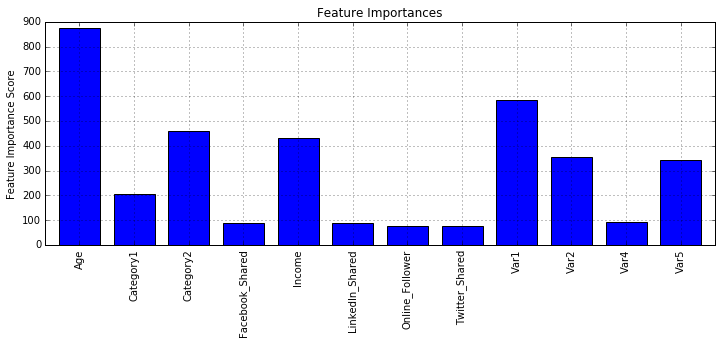

In [23]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train_data, test_data, predictors)


Model Report
Accuracy : 0.7801
AUC Score (Train): 0.814690
AUC Score (Test): 0.597873


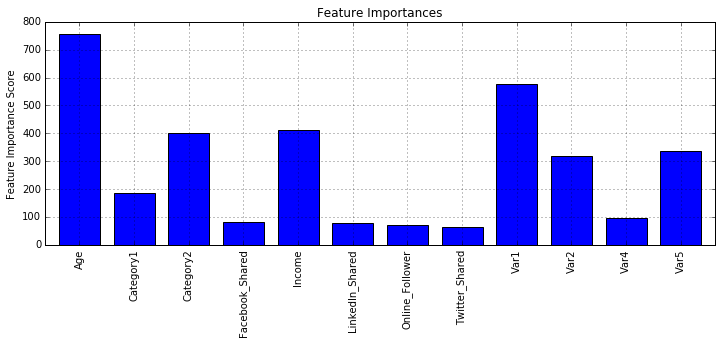

In [ ]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train_data, test_data, predictors)

In [ ]:
param_test1 = {
 'max_depth':range(1,10,2),
 'min_child_weight':range(1,10,2),
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5, 
                                                  min_child_weight=1, subsample=0.8, colsample_bytree=0.8, 
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, 
                                                  seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_